In [13]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

In [3]:
folder_path = r'C:\Users\Rafael_Fagundes\Downloads\delve_compiled_data.csv'

df = pd.read_csv(folder_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828009 entries, 0 to 1828008
Data columns (total 41 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Unnamed: 0                            int64  
 1   Audience Type                         object 
 2   Tactic                                object 
 3   Media Buy Name                        object 
 4   Campaign Name                         object 
 5   Fiscal Quarter                        object 
 6   Fiscal Week Year                      object 
 7   Country                               object 
 8   Display Funnel Mapped                 object 
 9   Display Dell Vehicle Mapped           object 
 10  Display Business Unit Mapped          object 
 11  Display Site Name Mapped              object 
 12  Audience Type Name                    object 
 13  Impressions                           float64
 14  Clicks                                float64
 15  Spend          

## Group Dataframe

In [18]:
grouped_df = df.groupby([
    'Audience Type',
    'Fiscal Quarter',
    'Fiscal Week Year',
    'Country',
    'BU'
]).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum',
    'Net Rev': 'sum',
    'HVE': 'sum'  
}).reset_index()

In [19]:
grouped_df['ROAS'] = grouped_df['Net Rev'] / grouped_df['Spend']

In [26]:
df_filtered = grouped_df[
    (grouped_df['BU'] == 'CSB') &
    (grouped_df['Country'] == 'United States') &
    (grouped_df['Fiscal Quarter'] == '2023-Q3')
]

<Axes: xlabel='Audience Type', ylabel='ROAS'>

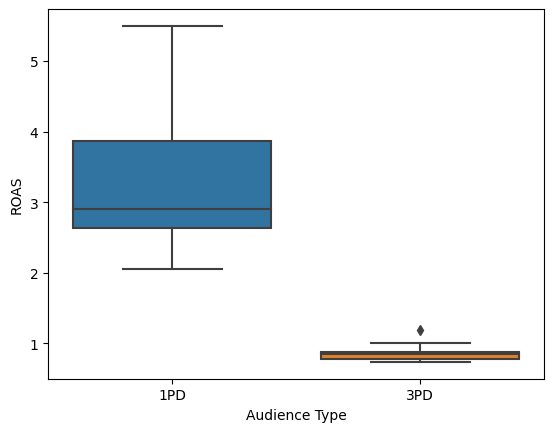

In [27]:
sns.boxplot(data=df_filtered, x='Audience Type', y='ROAS')